In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/train.csv')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [21]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


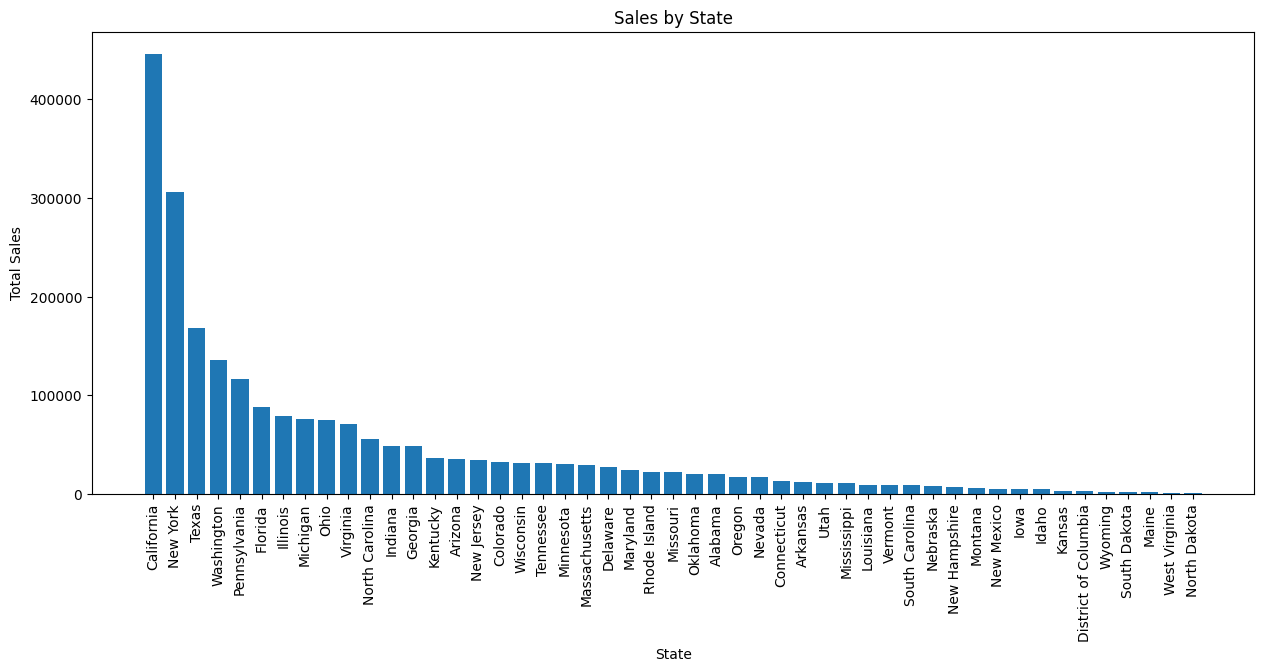

In [11]:
# @title Sales by State


df_state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(df_state_sales.index, df_state_sales.values)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Sales by State')
_ = plt.xticks(rotation=90)


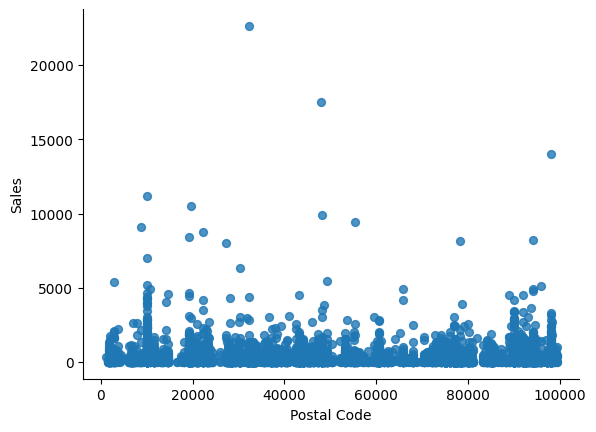

In [10]:
# @title Postal Code vs Sales

df.plot(kind='scatter', x='Postal Code', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

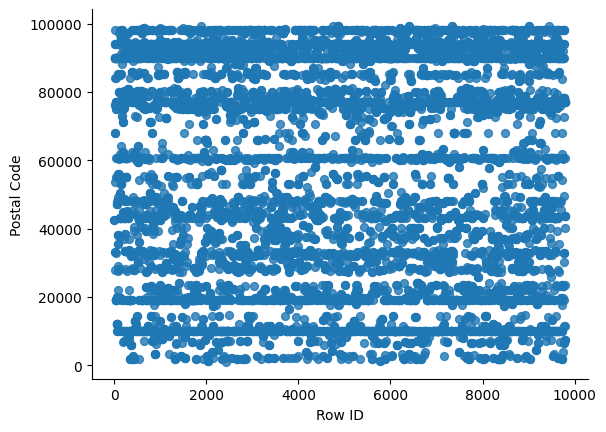

In [9]:
# @title Row ID vs Postal Code

df.plot(kind='scatter', x='Row ID', y='Postal Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

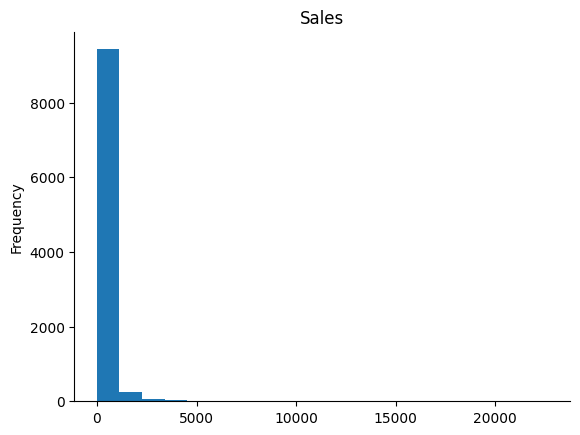

In [8]:
# @title Sales

df['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

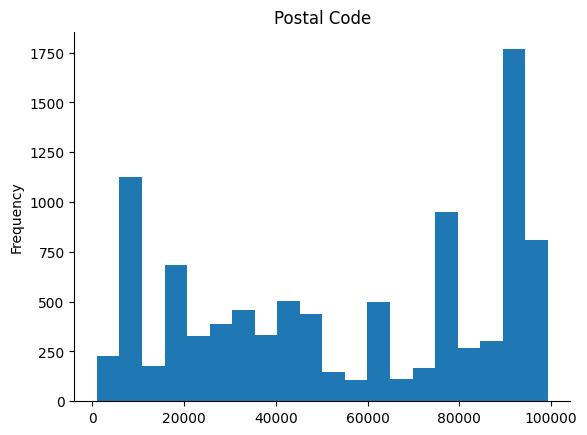

In [7]:

df['Postal Code'].plot(kind='hist', bins=20, title='Postal Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

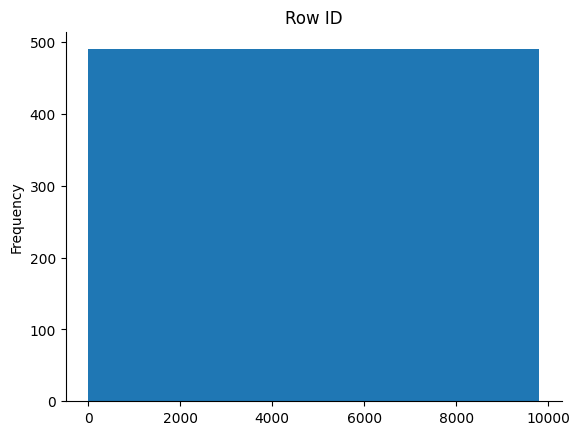

In [6]:
df['Row ID'].plot(kind='hist', bins=20, title='Row ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

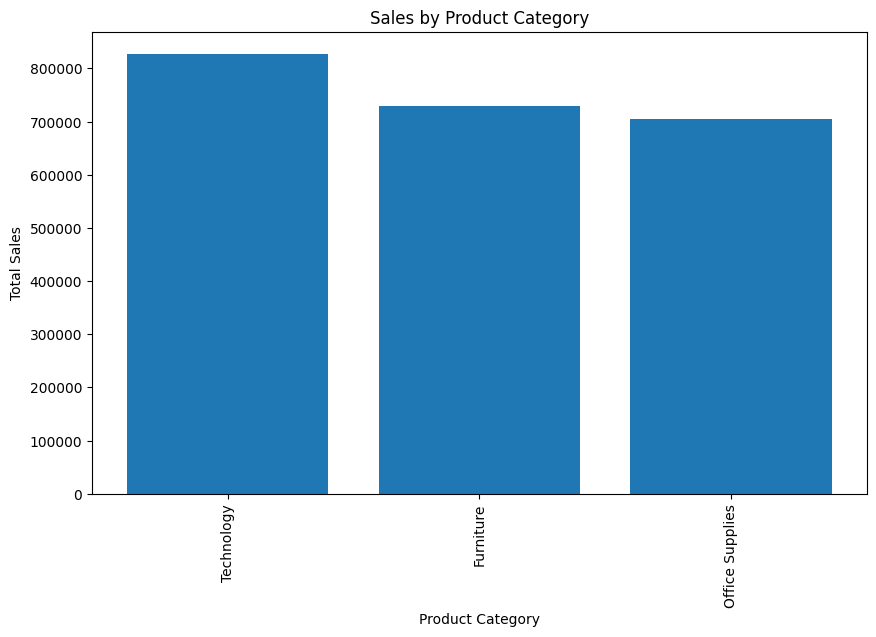

In [16]:
Sales by product category

df_product_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_product_sales.index, df_product_sales.values)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Sales by Product Category')
_ = plt.xticks(rotation=90)


<ipython-input-17-0e82f79ad840>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum, ci=None)


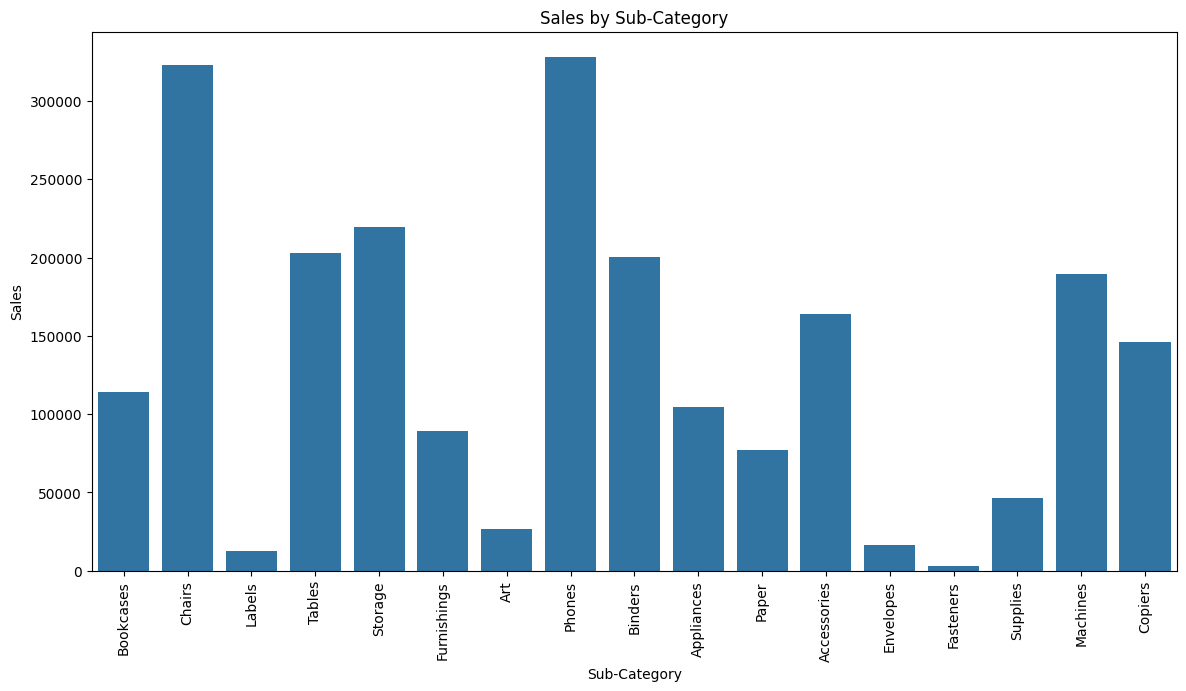

In [17]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Sub-Category', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Sales by Sub-Category')
plt.xticks(rotation=90)
plt.show()

Suggestions for improving sales performance

1. Identify the regions with the lowest sales and investigate the reasons.

In [23]:


# Identify the regions with the lowest sales
lowest_sales_regions = df.groupby('Region')['Sales'].sum().sort_values(ascending=True).head(3).index.to_list()

# Print the regions with the lowest sales
print("Regions with the lowest sales:")
for region in lowest_sales_regions:
  print(f"- {region}")


Regions with the lowest sales:
- South
- Central
- East


2. Analyze the performance of different product categories and sub-categories to identify underperforming products.

In [24]:


# Calculate the average sales for each product category
avg_sales_by_category = df.groupby('Category')['Sales'].mean()

# Identify product categories with below-average sales
underperforming_categories = avg_sales_by_category[avg_sales_by_category < avg_sales_by_category.mean()]

# Print the underperforming product categories
print("Underperforming product categories:")
for category in underperforming_categories.index.to_list():
  print(f"- {category}")

# Repeat the analysis for sub-categories
avg_sales_by_subcategory = df.groupby('Sub-Category')['Sales'].mean()
underperforming_subcategories = avg_sales_by_subcategory[avg_sales_by_subcategory < avg_sales_by_subcategory.mean()]

# Print the underperforming product subcategories
print("\nUnderperforming product subcategories:")
for subcategory in underperforming_subcategories.index.to_list():
  print(f"- {subcategory}")


Underperforming product categories:
- Office Supplies

Underperforming product subcategories:
- Accessories
- Appliances
- Art
- Binders
- Envelopes
- Fasteners
- Furnishings
- Labels
- Paper
- Phones
- Storage
- Supplies
